In [1]:
%cd ~

/root


In [2]:
import os
import japanize_matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [3]:
import subprocess

cmd = "find / -path */ipaexg.ttf 2> /dev/null | head -1"

IPAEXG_FONT_PATH = (
    subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        shell=True,
        encoding="utf-8",
    )
    .communicate()[0]
    .strip()
)

IPAEXG_FONT_PATH

'/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf'

In [4]:
def plot_wordcloud(
    text: str,
    width: float = 900,
    height: float = 500,
    stopwords: list[str] = [],
    filepath: str | None = None,
    font_path: str | None = None,
    collocations: bool = False,
    background_color: str = None,
    colormap: str = None,
    figsize: tuple[int] = (6, 4),
) -> None:
    wordcloud = WordCloud(
        width=width,
        height=height,
        stopwords=stopwords,
        font_path=font_path,
        collocations=collocations,
        background_color=background_color,
        colormap=colormap,
    ).generate(text)

    plt.figure(figsize=figsize)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    if filepath is not None:
        wordcloud.to_file(filepath)

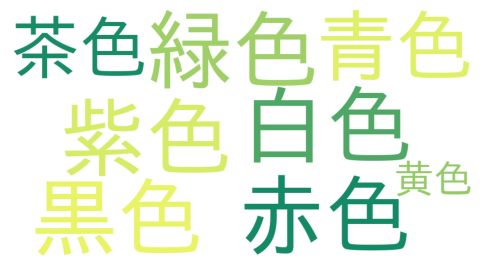

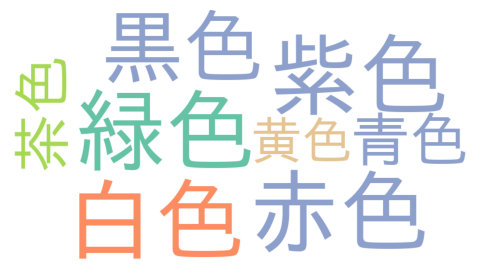

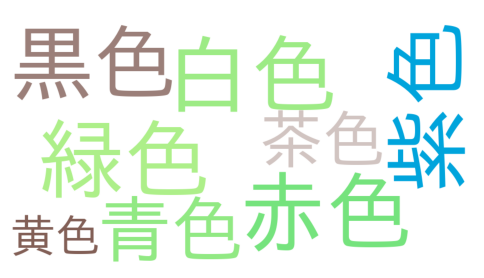

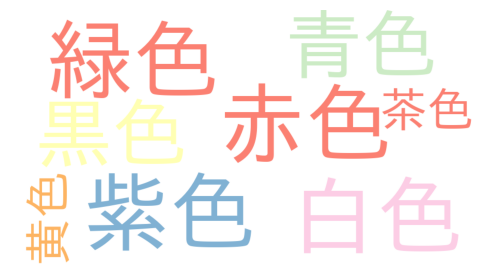

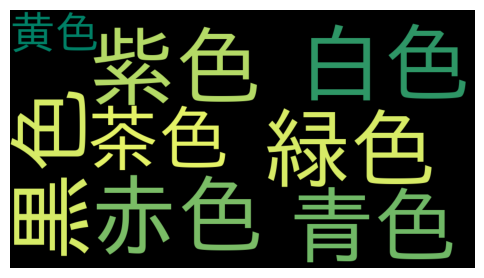

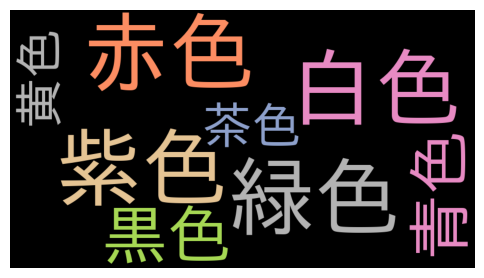

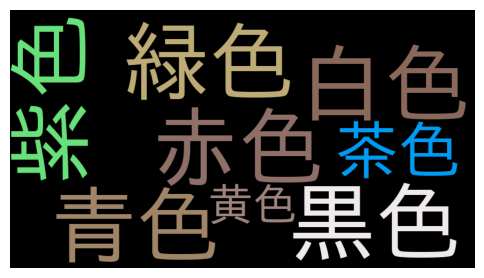

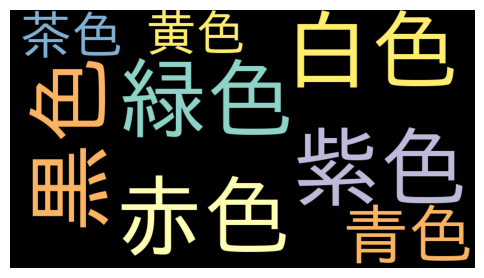

In [5]:
output_dir = "work/wordcloud/output"
os.makedirs(output_dir, exist_ok=True)

text = "緑色 赤色 紫色 白色 黒色 青色 茶色 黄色"
back_col = ["white", "black"]
col_pallete = ["summer", "Set2", "terrain", "Set3"]
for i, bc in enumerate(back_col):
    for cp in col_pallete:
        filename = "0" + str(i) + "_" + bc + "_" + cp + ".png"
        filepath = os.path.join(output_dir, filename)

        plot_wordcloud(
            text=text,
            font_path=IPAEXG_FONT_PATH,
            filepath=filepath,
            background_color=bc,
            colormap=cp,
        )